# Case-study : Age pyramid and male-female jobs distribution in a company

In [44]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('./dsn.csv')

In [46]:
data.head()

,dsn.csv,job_id,birthdate,sex
0,Richard Boulay,éducateur technique spécialisé technique spéci...,1963-06-30,H
1,Pierre Thomas-Marie,pédologue,1965-09-16,H
2,Juliette du Moreau,ingénieur plasturgiste,1990-07-26,F
3,Charles Gomes,pédologue,1988-12-06,F
4,Renée Bouvier,ingénieur plasturgiste,1973-10-28,H


In [47]:
data = data.rename({'dsn.csv': 'name'}, axis=1)

In [48]:
data.head()

,name,job_id,birthdate,sex
0,Richard Boulay,éducateur technique spécialisé technique spéci...,1963-06-30,H
1,Pierre Thomas-Marie,pédologue,1965-09-16,H
2,Juliette du Moreau,ingénieur plasturgiste,1990-07-26,F
3,Charles Gomes,pédologue,1988-12-06,F
4,Renée Bouvier,ingénieur plasturgiste,1973-10-28,H


In [49]:
data = data.dropna(axis=0)

In [50]:
current_date = "2021-03-21"

def find_age(birth_date, current_date):
    # takes as input a birth date in format YYYY-M-D and returns age
    birth_year, birth_month, birth_day = [int(x) for x in birth_date.split("-")]
    current_year, current_month, current_day = [int(x) for x in current_date.split("-")]
    years_difference = current_year - birth_year
    if current_month < birth_month or (current_month == birth_month and current_day < birth_day):
        return years_difference - 1
    else:
        return years_difference 

In [51]:
birth_date = ["2000-01-01", "2000-03-25", "2000-06-01"]

print(dict((key, find_age(key, current_date)) for key in birth_date))

{'2000-01-01': 21, '2000-03-25': 20, '2000-06-01': 20}


In [52]:
data["age"] = data["birthdate"].apply(lambda x: find_age(x, current_date))
data

,name,job_id,birthdate,sex,age
0,Richard Boulay,éducateur technique spécialisé technique spéci...,1963-06-30,H,57
1,Pierre Thomas-Marie,pédologue,1965-09-16,H,55
2,Juliette du Moreau,ingénieur plasturgiste,1990-07-26,F,30
3,Charles Gomes,pédologue,1988-12-06,F,32
4,Renée Bouvier,ingénieur plasturgiste,1973-10-28,H,47
...,...,...,...,...,...
9995,Eugène Lebreton,pilote de ligne automatisée (chimie - agroalim...,1980-10-04,H,40
9996,Charlotte du Marechal,chargé d'études en valorisation agricole des d...,1985-05-15,F,35
9997,Guillaume du Regnier,ingénieur qualité moteur,1971-01-25,F,50
9998,Adrien Blanchard,ingénieur qualité moteur,1960-08-19,F,60


## Regrouping data by age and sex

In [53]:
age_sex_with_counts = data.groupby(["age", "sex"]).size().to_frame(name = 'count').reset_index()
age_sex_with_counts

,age,sex,count
0,22,F,4
1,22,H,1
2,23,F,7
3,23,H,11
4,24,F,24
...,...,...,...
90,67,F,32
91,67,H,32
92,68,F,20
93,68,H,19


We change ages of females to their opposite in order to be able to plot the data for men and women respectively at the right and the left of the y axis (without overlapping).

In [54]:
age_sex_with_counts.loc[age_sex_with_counts['sex'] == 'F','count'] = - age_sex_with_counts['count']
age_sex_with_counts

,age,sex,count
0,22,F,-4
1,22,H,1
2,23,F,-7
3,23,H,11
4,24,F,-24
...,...,...,...
90,67,F,-32
91,67,H,32
92,68,F,-20
93,68,H,19


## Exhaustive display over all the ages in the company

(-0.5, 47.5)

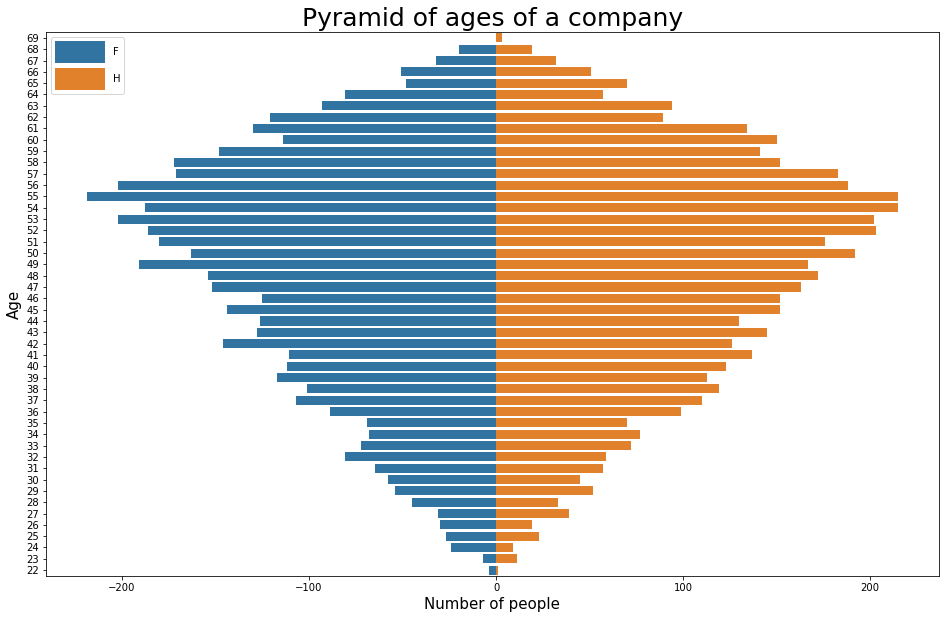

In [55]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
pyramid = sns.barplot(data=age_sex_with_counts, x='count', y='age',
            hue='sex',orient='horizontal', 
            dodge=False)
pyramid.axes.set_title("Pyramid of ages of a company",fontsize=25)
pyramid.set_xlabel("Number of people",fontsize=15)
pyramid.set_ylabel("Age", fontsize=15)
plt.legend(handlelength=5, handleheight=3)
plt.ylim(reversed(plt.ylim()))

## Display by age range of 5 years 

In [56]:
age_range = np.arange(20,71,5)
age_range

array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

Creating the corresponding labels (string format) that will be displayed on the plot :

In [57]:
labels = [str(age_range[k])+ '-' + str(age_range[k+1]) for k in range (len(age_range)-1)]
labels

['20-25',
 '25-30',
 '30-35',
 '35-40',
 '40-45',
 '45-50',
 '50-55',
 '55-60',
 '60-65',
 '65-70']

In [58]:
data['age-range'] = pd.cut(data['age'], bins=age_range, labels=labels)
data

,name,job_id,birthdate,sex,age,age-range
0,Richard Boulay,éducateur technique spécialisé technique spéci...,1963-06-30,H,57,55-60
1,Pierre Thomas-Marie,pédologue,1965-09-16,H,55,50-55
2,Juliette du Moreau,ingénieur plasturgiste,1990-07-26,F,30,25-30
3,Charles Gomes,pédologue,1988-12-06,F,32,30-35
4,Renée Bouvier,ingénieur plasturgiste,1973-10-28,H,47,45-50
...,...,...,...,...,...,...
9995,Eugène Lebreton,pilote de ligne automatisée (chimie - agroalim...,1980-10-04,H,40,35-40
9996,Charlotte du Marechal,chargé d'études en valorisation agricole des d...,1985-05-15,F,35,30-35
9997,Guillaume du Regnier,ingénieur qualité moteur,1971-01-25,F,50,45-50
9998,Adrien Blanchard,ingénieur qualité moteur,1960-08-19,F,60,55-60


Regrouping data by age range and sex :

In [59]:
age_sex_with_group_counts = data.groupby(["age-range", "sex"]).size().to_frame(name = 'count').reset_index()
age_sex_with_group_counts.loc[age_sex_with_group_counts['sex'] == 'F','count'] = - age_sex_with_group_counts['count']
age_sex_with_group_counts

,age-range,sex,count
0,20-25,F,-62
1,20-25,H,44
2,25-30,F,-218
3,25-30,H,188
4,30-35,F,-355
5,30-35,H,335
6,35-40,F,-526
7,35-40,H,564
8,40-45,F,-655
9,40-45,H,690


(-0.5, 9.5)

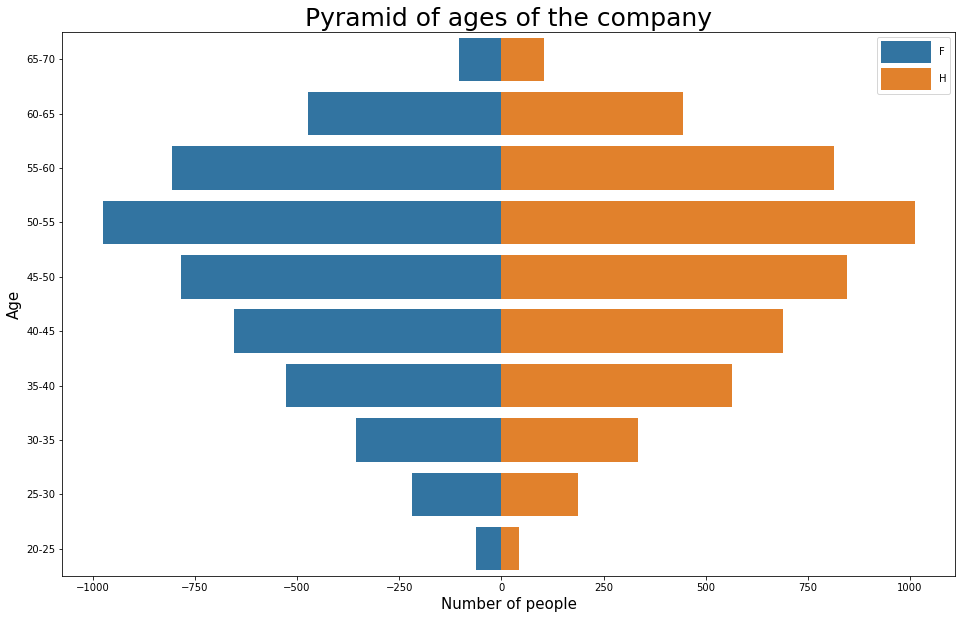

In [60]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
pyramid = sns.barplot(data=age_sex_with_group_counts, x='count', y='age-range',
            hue='sex',orient='horizontal', 
            dodge=False)
pyramid.axes.set_title("Pyramid of ages of the company",fontsize=25)
pyramid.set_xlabel("Number of people",fontsize=15)
pyramid.set_ylabel("Age", fontsize=15)
plt.legend(handlelength=5, handleheight=3)
plt.ylim(reversed(plt.ylim()))

## Affichage de la répartition des emplois pour chaque sexe

In [61]:
jobs = data['job_id'].unique()
jobs

array(['éducateur technique spécialisé technique spécialisée',
       'pédologue', 'ingénieur plasturgiste', 'technicien logistique',
       "chargé d'études en valorisation agricole des déchets",
       "designer d'interaction", 'ascensoriste',
       'architecte produit industriel', 'ingénieur qualité moteur',
       'pilote de ligne automatisée (chimie - agroalimentaire - industrie pharmaceutique)'],
      dtype=object)

Regrouping data by job and sex :

In [62]:
job_and_gender = data.groupby(["job_id", "sex"]).size().to_frame(name = 'count').reset_index()
job_and_gender

,job_id,sex,count
0,architecte produit industriel,F,458
1,architecte produit industriel,H,475
2,ascensoriste,F,509
3,ascensoriste,H,464
4,chargé d'études en valorisation agricole des d...,F,519
5,chargé d'études en valorisation agricole des d...,H,540
6,designer d'interaction,F,490
7,designer d'interaction,H,519
8,ingénieur plasturgiste,F,513
9,ingénieur plasturgiste,H,511


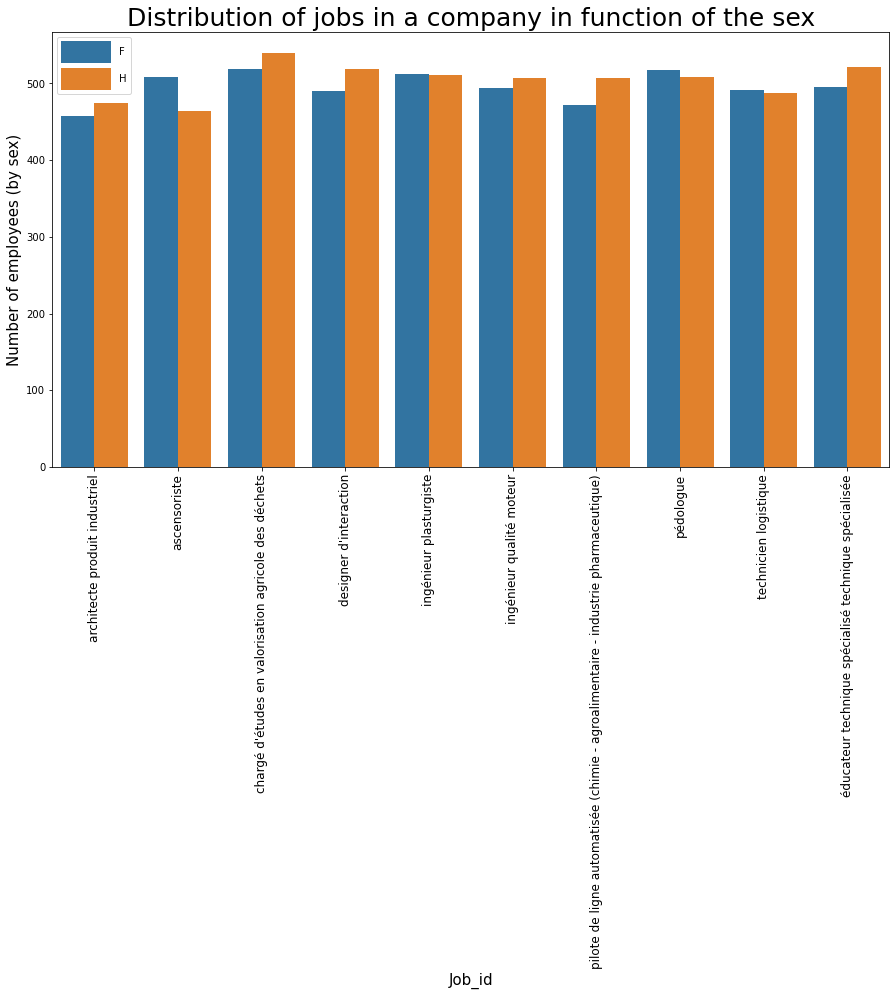

In [63]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
hist = sns.barplot(x="job_id",y="count", hue="sex", data = job_and_gender)

hist.set_title("Distribution of jobs in a company in function of the sex",fontsize=25)
hist.set_xlabel("Job_id", fontsize=15)
hist.set_ylabel("Number of employees (by sex)", fontsize=15)

plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=10)
plt.legend(handlelength=5, handleheight=3)
plt.show()